In [35]:
from scipy.stats import t
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture
from scipy.special import digamma
from scipy.stats import norm as normal
import scipy.special
import pymc as pm
import arviz as az
from scipy import stats

# Guía 4

# 4.1

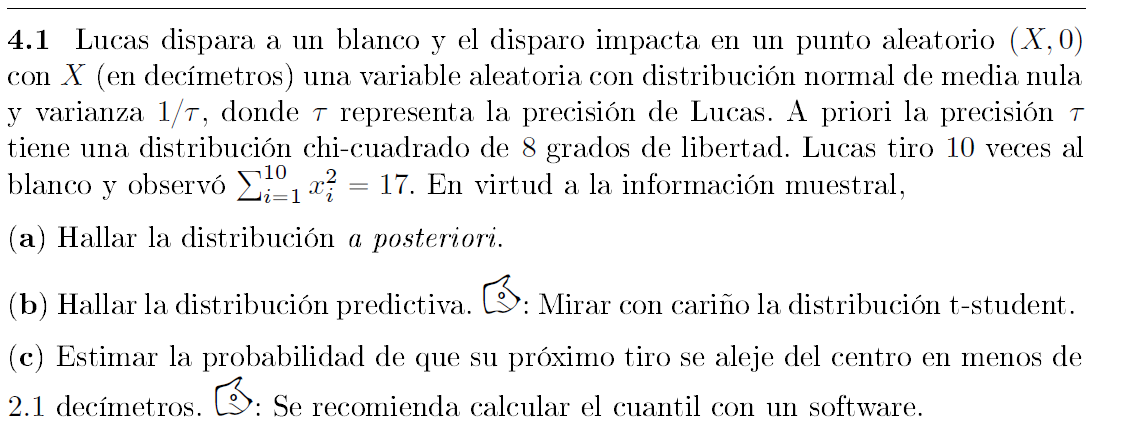

Precisión)- $\tau \sim \chi^2_8$

$X|_\tau \sim \mathcal{N}(0, \frac{1}{\tau})$

Disparo)- $D \sim \mathcal{U}(X, 0)$

Partiendo de la distribución condicional $X|_\tau$

$$p(x_i|\tau) = \frac{\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{\tau}{2}x_i^2}$$

Y $p(\tau)$ por ser $\chi^2_8$

$$p(\tau) = \frac{1}{2^\frac{8}{2} \Gamma(\frac{8}{2})} \tau^{\frac{8}{2}-1} e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$

Reemplazando numericamente ($\Gamma(4) = (4-1)! = 6$)

$$p(\tau) = \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$

Y aplicando inferencia Bayesiana:

$$p(\tau|D_n) \propto p(\tau) \prod_{i=1}^{n}p(x_i|\tau)$$


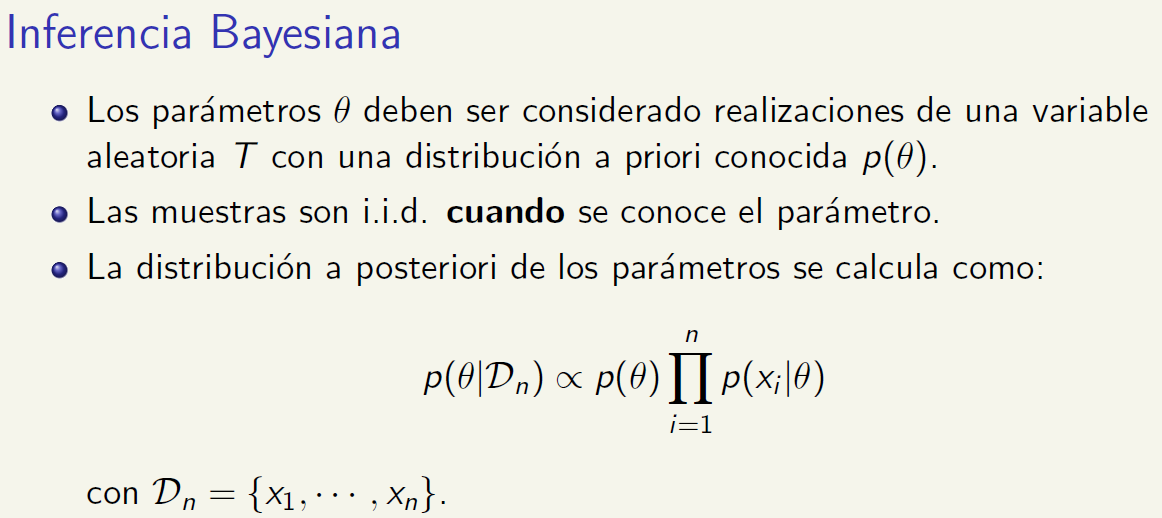

Desarrollo la productoria con el dato del enunciado $\sum_{i=1}^{10}x_i^2 = 17$. El término que acompaña a la exponencial termina elevandose a la $n/2$ (por ya tener raíz) y la exponencial termina teniendo la sumatoria que buscamos en su exponente.

$$\prod_{i=1}^{10} \frac{\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{\tau}{2}x_i^2} = (\frac{\tau}{2\pi})^{\frac{n}{2}} e^{-(\frac{\sum_{i = 1}^{10}x_i^2}{2} \tau)} = (\frac{\tau}{2\pi})^5 e^{-(\frac{17}{2}\tau)} \hspace{5mm} \mathcal{1} \{\tau > 0 \}$$

Y sabiendo que $p(\tau) = \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$ entonces

$$p(\tau|D_n) \propto \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} (\frac{\tau}{2\pi})^5 e^{-(\frac{17}{2}\tau)} = \frac{1}{96 (2\pi)^5}\tau^8 e^{-9\tau} = C \tau^8 e^{-9\tau} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$ 

que tiene la forma de una distribución Gamma de parámetros ($\nu = 9, \lambda = 9$)

- $\tau|D_n \sim \Gamma(\nu, \lambda)$
- $p(\tau|D_n) = \frac{9^9}{\Gamma(9)} \tau^8 e^{-9\tau}$



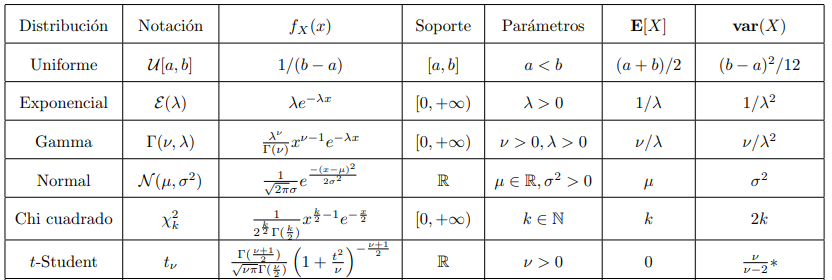

# Item 4.2

Hallar la distribución predictiva

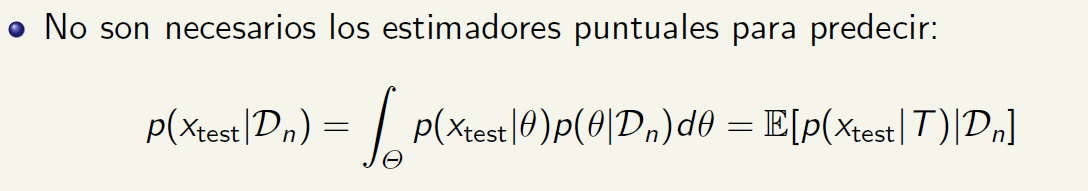

Planteo:

\begin{align*}
    p(x_{test}|D_n) &= \int_\tau p(x_{test}|\tau)p(\tau|D_n) d\tau\\

                    &= \int_0^{+\infty} (\frac{\tau}{2\pi})^{1/2} e^{\frac{\tau}{2}x^2_{test}} \frac{9^9}{\Gamma(9)}\tau^8 e^{-9\tau} d\tau\\

                    &= \int_0^{+\infty} \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \tau^{\frac{17}{2}} e^{-(\frac{x^2_{test}}{2} + 9)\tau} d\tau
\end{align*}

Para que coincida el exponente del $\tau$ siendo $\frac{17}{2} + 1 = 9.5 = \nu$ y tomando el exponente de la exponencial se puede proponer una distribución $t \sim \Gamma (9.5, \frac{x^2_{test}}{2} + 9)$, por lo tanto planteamos:

$$f_T(t) = \frac{(\frac{x^2_{test}}{2} + 9)^{9.5}}{\Gamma(9.5)} t ^{9.5 - 1} e^{-(\frac{x^2_{test}}{2}+ 9)t}$$

Volviendo a la integral planteo los términos necesarios a añadir para que me quede la función de distribución a integrar dentro del soporte y que de esa forma me de igual a 1:

\begin{align*}
    p(x_{test}|D_n) &= \int_0^{+\infty} \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \tau^{\frac{17}{2}} e^{-(\frac{x^2_{test}}{2} + 9)\tau} d\tau\\

                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \frac{\Gamma(9.5)}{(\frac{x^2_{test}}{2} + 9)^{9.5}}
\end{align*}

Trato de llevar la expresión a la $t-Student$

\begin{align*}
                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \frac{\Gamma(9.5)}{(\frac{x^2_{test}}{2} + 9)^{9.5}}\\

                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \Gamma(\frac{18 + 1}{2})(\frac{x^2_{test}}{2} + 9)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{2\pi}} 9^9 \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{2} + 9)^{-\frac{18+1}{2}}\\
\end{align*}

Saco factor común del paréntesis el 9

\begin{align*}
                    &= \frac{1}{\sqrt{2\pi}} 9^9 \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}} 9^{-(\frac{18+1}{2})}\\

                    &= \frac{1}{\sqrt{2\pi}} \frac{9^9}{9^{9.5}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{9}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{18\pi}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\
\end{align*}

Llegando a que

$$x_{test}|D_n \sim t_{18}$$

$$p(x_{test}|D_n) = \frac{1}{\sqrt{18\pi}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}$$

# Item C

In [6]:
prob = t.cdf(2.1, 18) - t.cdf(-2.1, 18)

print("La probabilidad de que el tiro se aleje del centro en menos de 2.1 decímetros es de {:.4f}".format(prob))

La probabilidad de que el tiro se aleje del centro en menos de 2.1 decímetros es de 0.9499


# Ejercicio 4.2

# Item A

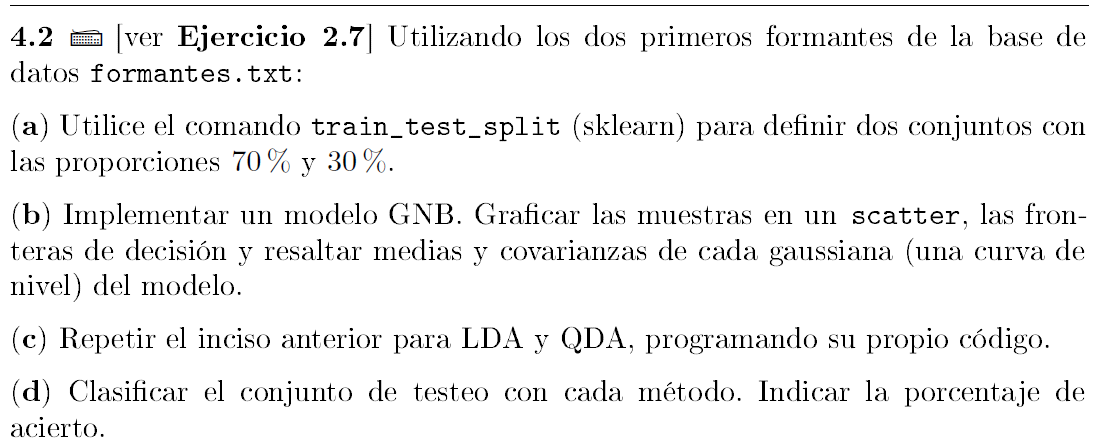

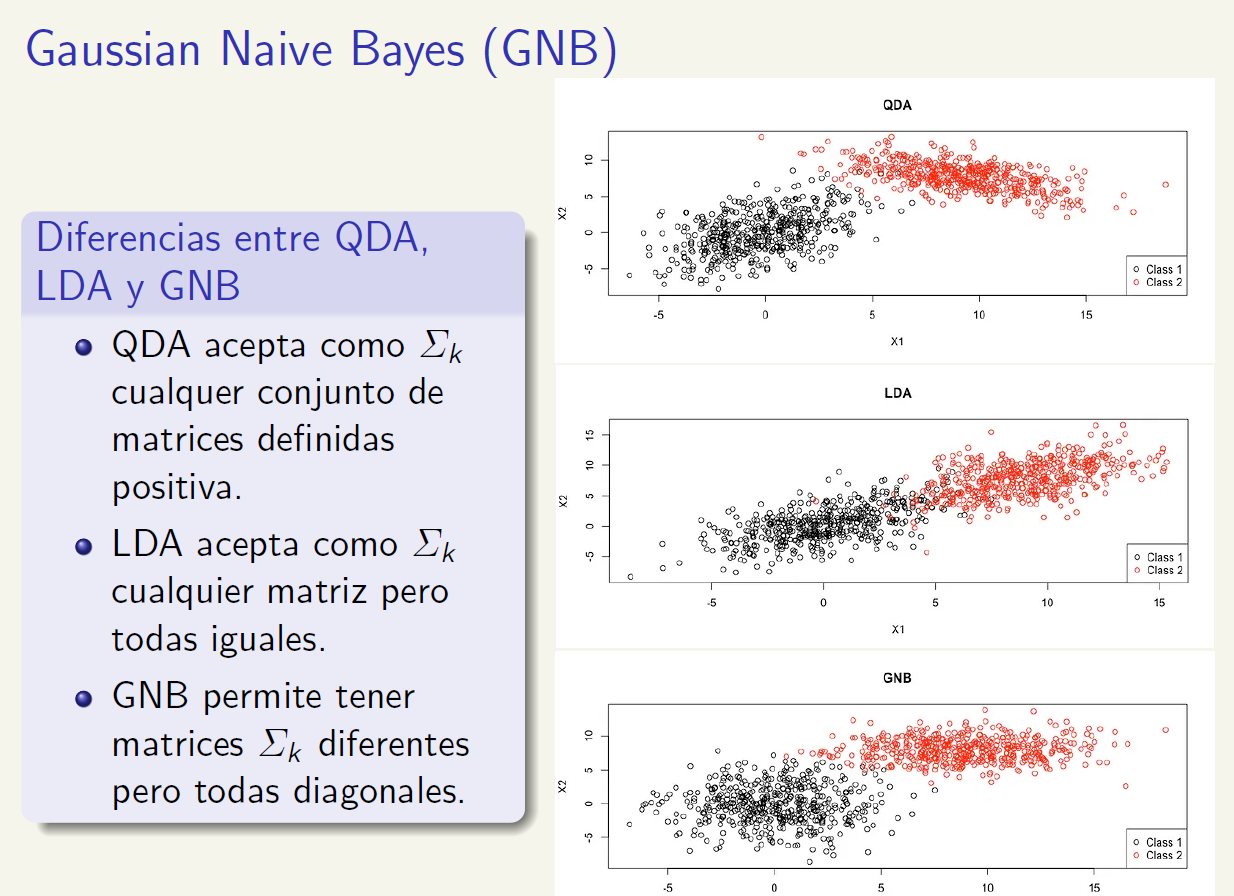

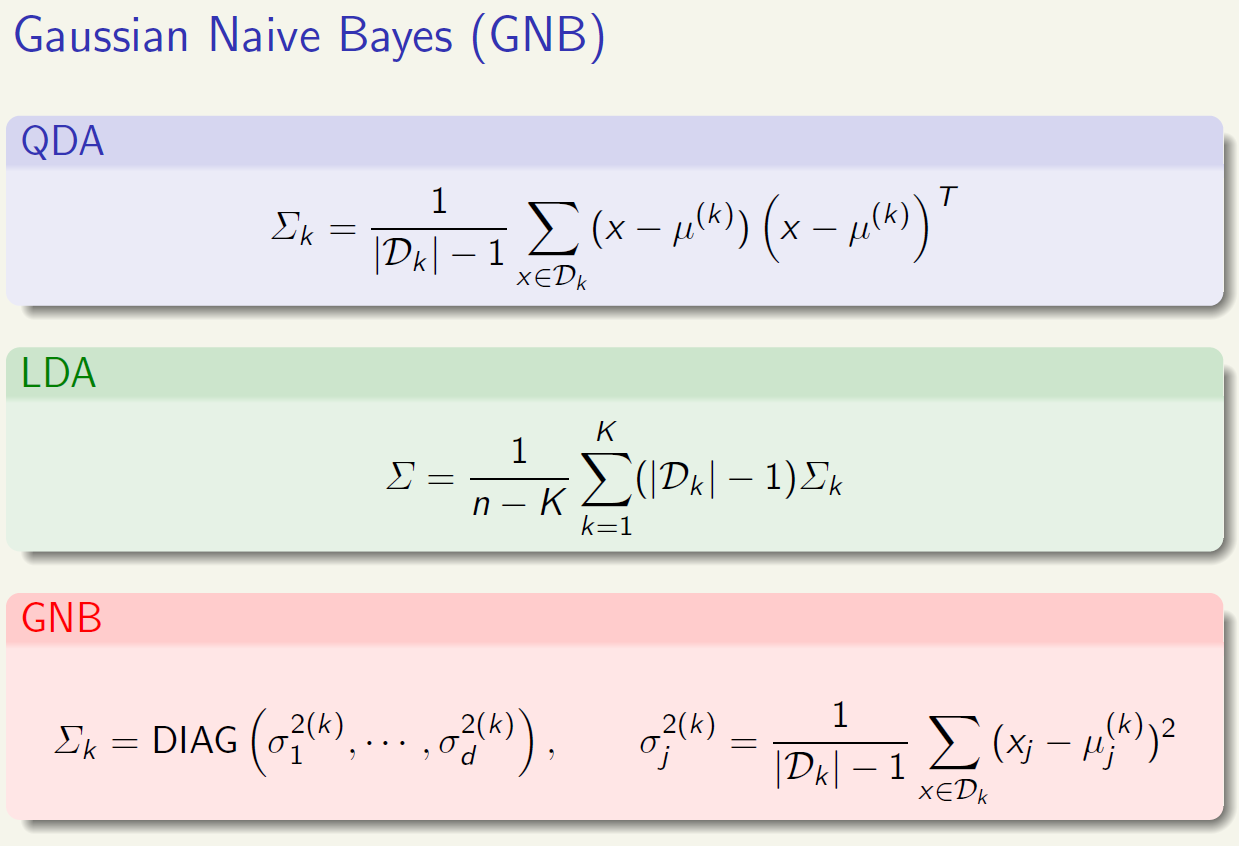

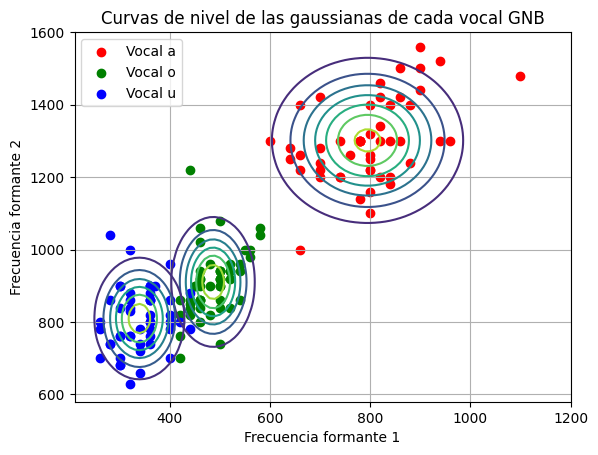

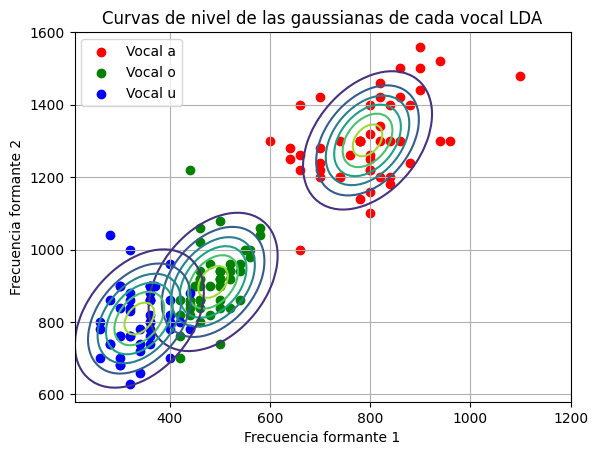

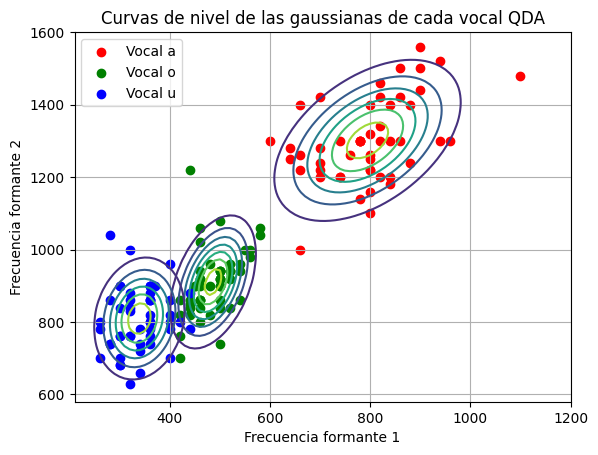

In [47]:
def clasificador(pdf_a, pdf_o, pdf_u, p_priori):
    # Calculo la frontera de decisión
    posterior_a = pdf_a.pdf(np.dstack((X, Y))) * p_priori[0]
    posterior_o = pdf_o.pdf(np.dstack((X, Y))) * p_priori[1]
    posterior_u = pdf_u.pdf(np.dstack((X, Y))) * p_priori[2]

    # Determina la clase más probable para cada punto de la malla
    Z = np.argmax(np.stack([posterior_a, posterior_o, posterior_u], axis=0), axis=0)
    # Grafica las fronteras de decisión
    return Z


data = pd.read_csv('data/formantes.txt', sep='\t', header = None)

# Separo el conjunto en train 70% y test 30%
train_set, test_set = train_test_split(data, test_size=0.3)

test_labels = test_set.drop(columns=[0,1,2]).values # Me quedo solo con la etiqueta
test_set = test_set.drop(columns=[2, 3]).values # Me saco la formante 3 y la etiqueta


# Viene dado por 3 columnas que son las frecuencias de las formantes y la cuarta dice si la vocal es /a/ /o/ /u/
# Me separo las formantes por vocal y me quedo con las primeras 2 para graficarlas en 2D

formantes_a = data.loc[data[3] == 'a'].drop(columns=[2, 3])
formantes_a = formantes_a.values

formantes_o = data.loc[data[3] == 'o'].drop(columns=[2, 3])
formantes_o = formantes_o.values

formantes_u = data.loc[data[3] == 'u'].drop(columns=[2, 3])
formantes_u = formantes_u.values

n = len(data)
n_a = len(formantes_a)
n_o = len(formantes_o)
n_u = len(formantes_u)

# Calculo la media y la covarianza de cada formante
media_a = np.mean(formantes_a, axis=0)
media_o = np.mean(formantes_o, axis=0)
media_u = np.mean(formantes_u, axis=0)

# Sigma_QDA
sigma_a = np.cov(formantes_a, rowvar=False, bias = False)
sigma_o = np.cov(formantes_o, rowvar=False, bias = False)
sigma_u = np.cov(formantes_u, rowvar=False, bias = False)

# Sigma_LDA
sigma_LDA = 1 / (n - 3) * ((n_a - 1) * sigma_a + (n_o - 1) * sigma_o + (n_u - 1) * sigma_u)

# Sigma_GNB
diag_a = 1 / (n_a - 1) * (formantes_a - media_a).T @ (formantes_a - media_a)
diag_o = 1 / (n_o - 1) * (formantes_o - media_o).T @ (formantes_o - media_o)
diag_u = 1 / (n_u - 1) * (formantes_u - media_u).T @ (formantes_u - media_u)

sigma_GNB_a = np.diag(np.diag(diag_a))
sigma_GNB_o = np.diag(np.diag(diag_o))
sigma_GNB_u = np.diag(np.diag(diag_u))

# Obtengo las funciones de densidad de probabilidad de cada clase
pdf_a_LDA = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_LDA)
pdf_o_LDA = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_LDA)
pdf_u_LDA = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_LDA)

pdf_a_GNB = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_GNB_a)
pdf_o_GNB = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_GNB_o)
pdf_u_GNB = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_GNB_u)

pdf_a_QDA = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_a)
pdf_o_QDA = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_o)
pdf_u_QDA = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_u)

# Grafico las curvas de nivel de las gaussianas
X = np.linspace(210, 1200, 100)
Y = np.linspace(580, 1600, 100)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

grid_points = np.c_[X.ravel(), Y.ravel()]

# Densidad de probabilidad de cada punto
Z_a_GNB = pdf_a_GNB.pdf(pos)
Z_o_GNB = pdf_o_GNB.pdf(pos)
Z_u_GNB = pdf_u_GNB.pdf(pos)

#Z = clasificador(sigma_GNB_a, sigma_GNB_o, sigma_GNB_u, media_a, media_o, media_u, grid_points) # Predecir la clase para cada punto de la cuadrícula
#Z = Z.reshape(X.shape)  # Darle la forma correcta a Z para poder graficarlo

plt.figure()
#plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

plt.contour(X, Y, Z_a_GNB)
plt.contour(X, Y, Z_o_GNB)
plt.contour(X, Y, Z_u_GNB)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal GNB')
plt.legend()
plt.grid()
plt.show()

Z_a_LDA = pdf_a_LDA.pdf(pos)
Z_o_LDA = pdf_o_LDA.pdf(pos)
Z_u_LDA = pdf_u_LDA.pdf(pos)

#Z = clasificador(sigma_LDA, sigma_LDA, sigma_LDA, media_a, media_o, media_u, grid_points)   # Predecir la clase para cada punto de la cuadrícula
#Z = Z.reshape(X.shape)  # Darle la forma correcta a Z para poder graficarlo

plt.figure()
#plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

plt.contour(X, Y, Z_a_LDA)
plt.contour(X, Y, Z_o_LDA)
plt.contour(X, Y, Z_u_LDA)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal LDA')
plt.legend()
plt.grid()
plt.show()


Z_a_QDA = pdf_a_QDA.pdf(pos)
Z_o_QDA = pdf_o_QDA.pdf(pos)
Z_u_QDA = pdf_u_QDA.pdf(pos)

#Z = clasificador(sigma_a, sigma_o, sigma_u, media_a, media_o, media_u, grid_points) # Predecir la clase para cada punto de la cuadrícula
#Z = Z.reshape(X.shape)  # Darle la forma correcta a Z para poder graficarlo

plt.figure()
#plt.contour(X, Y, Z, levels=[-1, 0, 1], colors='black', linewidths=2, linestyles='dashed')

plt.contour(X, Y, Z_a_QDA)
plt.contour(X, Y, Z_o_QDA)
plt.contour(X, Y, Z_u_QDA)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal QDA')
plt.legend()
plt.grid()
plt.show()




# Item D

In [65]:
def clasificar(x, medias_vec, sigma, len_vec, n, algoritmo, clases = 3):
    len_test = len(x)
    args = np.zeros((len_test, clases))
    
    if algoritmo == 'LDA':
        print(algoritmo)
        # Calculo los pesos
        w_a = np.linalg.inv(sigma[0]) @ medias_vec[0].T
        w_o = np.linalg.inv(sigma[1]) @ medias_vec[1].T
        w_u = np.linalg.inv(sigma[2]) @ medias_vec[2].T
        
        b_a = -0.5 * medias_vec[0] @ np.linalg.inv(sigma[0]) @ medias_vec[0].T + np.log(len_vec[0] / n)
        b_o = -0.5 * medias_vec[1] @ np.linalg.inv(sigma[1]) @ medias_vec[1].T + np.log(len_vec[1] / n)
        b_u = -0.5 * medias_vec[2] @ np.linalg.inv(sigma[2]) @ medias_vec[2].T + np.log(len_vec[2] / n)
        
        for i in range(len_test):
            args[i, 0] = x[i] @ w_a + b_a
            args[i, 1] = x[i] @ w_o + b_o
            args[i, 2] = x[i] @ w_u + b_u
    
    # Si es QDA o GNB
    else:
        for i in range(len_test):
            args[i, 0] = -0.5 * (x[i, :] - medias_vec[0]) @ np.linalg.inv(sigma[0]) @ (x[i, :] - medias_vec[0]).T + np.log(len_vec[0] / n) - np.log(np.linalg.det(sigma[0])) / 2
            args[i, 1] = -0.5 * (x[i, :] - medias_vec[1]) @ np.linalg.inv(sigma[1]) @ (x[i, :] - medias_vec[1]).T + np.log(len_vec[1] / n) - np.log(np.linalg.det(sigma[1])) / 2
            args[i, 2] = -0.5 * (x[i, :] - medias_vec[2]) @ np.linalg.inv(sigma[2]) @ (x[i, :] - medias_vec[2]).T + np.log(len_vec[2] / n) - np.log(np.linalg.det(sigma[2])) / 2
        
    return np.argmax(args, axis=1)
    

medias_vec = np.array([media_a, media_o, media_u])
len_vec = np.array([n_a, n_o, n_u])

sigmas_LDA = np.array([sigma_LDA, sigma_LDA, sigma_LDA])
sigmas_GNB = np.array([sigma_GNB_a, sigma_GNB_o, sigma_GNB_u])
sigmas_QDA = np.array([sigma_a, sigma_o, sigma_u])

test_labels_num = [0 if char == 'a' else 1 if char == 'o' else 2 for char in test_labels]

print("Probabilidad de error para algoritmo LDA = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_LDA, len_vec, n, 'LDA')))
print("Probabilidad de error para algoritmo GNB = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_GNB, len_vec, n, 'GNB')))
print("Probabilidad de error para algoritmo QDA = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_QDA, len_vec, n, 'QDA')))


LDA
Probabilidad de error para algoritmo LDA =  0.022222222222222254
Probabilidad de error para algoritmo GNB =  0.0888888888888889
Probabilidad de error para algoritmo QDA =  0.022222222222222254


# Ejercicio 4.3

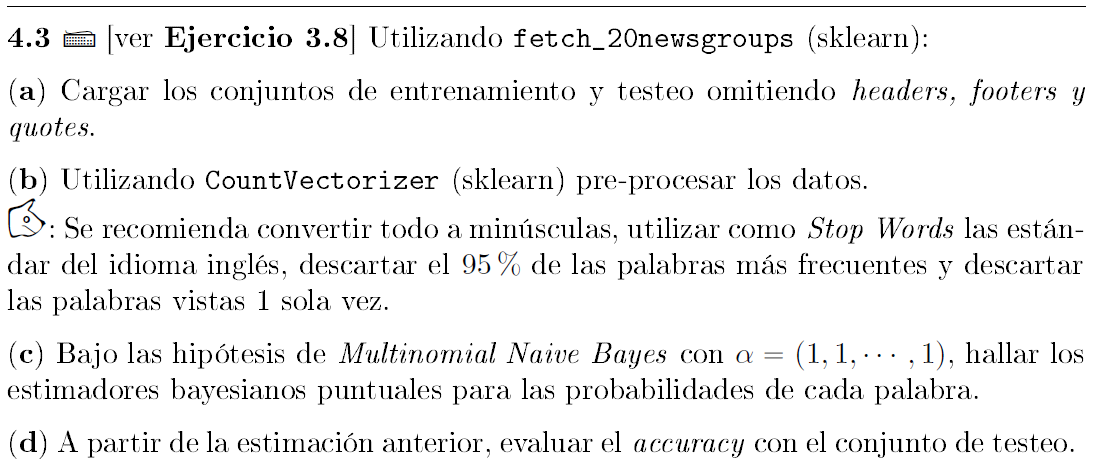

# CountVectorizer

El CountVectorizer de scikit-learn es una herramienta utilizada para convertir una colección de textos en una matriz de características numéricas, donde cada fila representa un documento y cada columna representa una palabra (o un n-grama) en el vocabulario. En otras palabras, convierte un texto en una representación de frecuencia de palabras.

Funcionamiento de CountVectorizer:
El principal propósito de CountVectorizer es realizar un análisis de texto y crear una matriz de términos. Cada valor en la matriz indica la cantidad de veces que una palabra aparece en un documento.

Características Principales:

- Tokenización: CountVectorizer divide el texto en palabras (tokens) según una estrategia de tokenización (por defecto, divide por espacios y puntuación).
- Vocabulario: Se construye un vocabulario que contiene todas las palabras únicas que aparecen en los documentos proporcionados.
- Frecuencia de Palabras: Cuenta las ocurrencias de cada palabra en cada documento


## Pasos que realiza CountVectorizer:

### 1- Ajuste del modelo:

Primero, CountVectorizer construye un vocabulario a partir de los documentos proporcionados. Este vocabulario incluye todas las palabras únicas que aparecen en los documentos.
Puedes personalizar la tokenización, como filtrar palabras muy comunes (stopwords), limitar el análisis a solo palabras alfabéticas, entre otros.

### 2- Transformación:

Después de ajustar el modelo al conjunto de datos, fit_transform() convierte el texto en una matriz dispersa, donde las filas corresponden a los documentos y las columnas a las palabras del vocabulario.
Cada valor en la matriz representa la cantidad de veces que una palabra (columna) aparece en un documento (fila).


## Argumentos Comunes de CountVectorizer:

- stop_words: Puedes eliminar palabras muy comunes (por ejemplo, "el", "de", "a") que no aportan mucha información al modelo.
- ngram_range: Permite especificar el rango de n-gramas a considerar (por ejemplo, pares de palabras o trios de palabras).
- max_features: Limita el número de características (palabras) que se extraen. Si se establece, solo se seleccionan las max_features más frecuentes.


# Multinomial Naive Bayes

El Multinomial Naive Bayes (MNB) es una variante del algoritmo de Naive Bayes, utilizado principalmente para clasificación de texto, donde las características son representadas como la frecuencia de aparición de palabras en los documentos. Se basa en el modelo de probabilidad multinomial para modelar la distribución de las características (las palabras en el texto).

# ¿Para qué se usa el Multinomial Naive Bayes?
El Multinomial Naive Bayes es especialmente popular para problemas de clasificación de texto, ya que es muy eficiente y fácil de implementar. Algunos de los casos de uso más comunes incluyen:

### 1- Clasificación de Texto:

- Spam detection: Detectar si un correo electrónico es spam o no.
- Análisis de Sentimientos: Clasificar el sentimiento de un texto como positivo, negativo o neutral.
- Clasificación de Noticias: Clasificar artículos de noticias en diferentes categorías (deportes, política, entretenimiento, etc.).

### 2- Filtrado de contenido 

Se puede usar para filtrar textos en base a categorías predefinidas.

### 3- Sistemas de recomendación

Usado en sistemas de recomendación de contenido textual, como sugerencias de artículos o productos basados en descripciones.

### 4- Clasificación de Documentos

En aplicaciones donde el objetivo es organizar grandes volúmenes de texto, como en bibliotecas o bases de datos.

Yendo al caso de predicción de palabras en documentos:

$$Y \sim \text{Cat}({c_1, ..., c_k})$$
$$X_j | Y = k \sim \text{Cat} ({\theta_1^{(k)}}, ..., \theta_V^{(k)})$$

- $X_j | Y = k$ representando a la palabra $j$ dado el documento de clase $k$
- $\theta_i^{(k)}$ con $i = 1, ..., V$ representando a la probabilidad de la palabra $i-ésima$ para la posición $j$ y clase $k$

### Sobre las variables contadores

Sea $\mathbf{N} = (N_1, ..., N_V)$, es sencillo notar que $\sum_{m=1}^V N_m = d$ y $\mathbf{N}|_{Y=k} \sim \mathcal{M}(d, [\theta^{(k)}_1, ..., \theta^{(k)}_V])$

- $N_m|Y=k$ es la cantidad de palabras con valor $m$ en un texto de clase $k$
- $d$ es la cantidad de palabras totales en un documento$

### Probabilidades de Clases
Los parámetros $c_1, ..., c_k$ son estimados por máxima verosimilitud como:

$$\hat{c}_k = \frac{\#\{y_i = k\}}{n}$$


### Estimación de $\theta_m^{k}$
Se cuenta con datos \{(\mathbf{N}_i, y_i)\}^n_{i=1}. Sin embargo, para cada clase $k$ se utilizarán los datos con ${y_i = k}$ distribuidos como una multinomial de probabilidades $\theta_1^{(k)}, ..., \theta_V^{(k)}$. A su vez, dado que las variables $N_m$ cuentan ocurrencias, puedo compactar todas las muestras de entrenamiento de cada clase en una sola (suficiencia estadística).

$$Ñ_m^{(k)} = \sum_{i=1}^n N_{i,m} \cdot \hspace{2mm} \mathcal{1}\{y_i = k\}$$

- $N_{i, m} representa la cantidad de veces que la palabra $m$ aparece en el documento $i$
- La indicadora genera que solo se sumen los documentos pertenecientes a la clase $k$
- $Ñ_m^{(k)}$ es el resultado de la suma de TODAS las ocurrencias de la palabra $m$ a lo largo de las muestras de la clase $k$

### Modelado: Estimador Bayesiano
Como modelado para el entrenamiento se supone $\mathbf{T} \sim \text{Dir}([\alpha_1, ... \alpha_V])$ y $(Ñ_1^{(k)}, ..., Ñ_V^{(k)})|_{\mathbf{T}=\Theta} \sim \mathcal{M}_n (\~{d}^{(k)}, [\theta_1^{(k)}, ..., \theta_V^{(k)}])$

- Siendo $T = (T_1, ..., T_V) \sim \text{Dir}([\alpha_1, ..., \alpha_V])$
- $\~{d}^{(k)}$ el número total de observaciones de la clase $k$

### Distribución a Posteriori
Desarrollando la misma $p(\theta_1^{(k)}, ..., \theta_V^{(k)}|Ñ_1^{(k)}, ..., Ñ_V^{(k)})$ se obtiene que

$$\mathbf{T}|_{Ñ_1^{(k)}, ..., Ñ_V^{(k)}} \sim \text{Dir}([Ñ_1^{(k)} + \alpha_1, ..., Ñ_V^{(k)} + \alpha_V])$$

### Estimador Bayesiano

$$\hat{\theta}_m^{(k)} = \mathcal{E}[T_m|Ñ_1^{(k)}, ..., Ñ_V^{(k)}] = \frac{Ñ_m^{(k)} + \alpha_m}{\sum_{\eta=1}^V Ñ_\eta^{(k)} + \alpha_\eta}$$

Siendo:
- $\hat{\theta}_m^{(k)}  = \frac{Ñ_m^{(k)} + \alpha_m}{\sum_{\eta=1}^V Ñ_\eta^{(k)} + \alpha_\eta}$ la probabilidad estimada de la palabra $m$ en la clase $k$
- $Ñ_m^{(k)} = \sum_{i=1}^n N_{i,m} \cdot \hspace{2mm} \mathcal{1}\{y_i = k\}$ la frecuencia de la palabra $m$ en todos los documentos de la clase $k$
- $N_m$ la cantidad de predictores con valor $m$
- $N_{i,m}$ la cantidad de veces que la palabra $m$ aparece en el documento $i$
- $\alpha_m$ el suavizado para la palabra $m$
- $V$ el tamaño del vocabulario (cantidad de palabras distintas)



In [70]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'qoutes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'qoutes'))

# CountVectorizer: convierte una colección de documentos de texto en una matriz de conteo de tokens (frecuencias de palabras)
# stop_words='english': Esto usa las stopwords estándar en inglés, que son un conjunto predefinido de palabras comunes que se suelen descartar, como "the", "and", "is", etc.
# max_df=0.95: Esto descarta las palabras que aparecen en el 95% de los documentos más frecuentes. Es útil para eliminar palabras demasiado comunes que no aportan información significativa.
# min_df=2: Esto asegura que se descarten las palabras que aparecen en solo un documento (aparecen una vez). Es útil para eliminar palabras poco frecuentes que podrían ser ruidosas.
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer

vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.95, min_df=2)
X_train = vectorizer.fit_transform(train_data.data) # Ajusta el vectorizador y lo transforma en una matriz de conteo de tokens
X_test = vectorizer.transform(test_data.data) # Transforma los datos de test en una matriz de conteo de tokens

# Clasificador Naive Bayes
y_train = train_data.target # Etiquetas de entrenamiento
y_test = test_data.target # Etiquetas de test

n_palabras = X_train.shape[1] # Cantidad de palabras
n_clases = len(np.unique(y_train)) # Cantidad de clases

N = np.zeros((n_clases, n_palabras)) # Matriz de palabras
alpha = np.ones(n_palabras) # Parámetro de suavizado (todo en 1 por enunciado)

# Cuento la cantidad de palabras por clase
for i in range(n_clases):
    clases_index = np.where(y_train == i)[0] # Indices de las clases
    N[i, :] = X_train[clases_index, :].sum(axis=0) # Sumo la frecuencia de palabras en el documento de lase i
    
theta = (N + alpha) / (N.sum(axis=1).reshape(-1, 1) + alpha.sum()) # Calculo la probabilidad de cada palabra por clase

[[2.57479788e-05 3.00393086e-04 8.58265959e-06 ... 8.58265959e-06
  8.58265959e-06 8.58265959e-06]
 [2.74403629e-04 1.37201815e-04 9.14678765e-06 ... 9.14678765e-06
  9.14678765e-06 9.14678765e-06]
 [1.35276663e-04 2.61825799e-05 4.36376331e-06 ... 8.29115029e-05
  4.36376331e-06 4.36376331e-06]
 ...
 [4.74876087e-05 1.04472739e-03 1.18719022e-05 ... 5.93595109e-06
  5.93595109e-06 5.93595109e-06]
 [1.73814800e-04 4.20052434e-04 7.24228335e-06 ... 7.24228335e-06
  7.24228335e-06 7.24228335e-06]
 [3.91504355e-05 1.66389351e-04 9.78760889e-06 ... 9.78760889e-06
  9.78760889e-06 9.78760889e-06]]


# Item D

In [71]:
c_k = np.bincount(y_train)/len(y_train)
y_pred = np.argmax(np.log(c_k).reshape(-1, 1) + np.log(theta) @ X_test.T, axis=0)

accuracy_score(y_test, y_pred)

print("La precisión del clasificador Naive Bayes es de {:.4f}".format(accuracy_score(y_test, y_pred)))

La precisión del clasificador Naive Bayes es de 0.7558


# Ejercicio 4.4

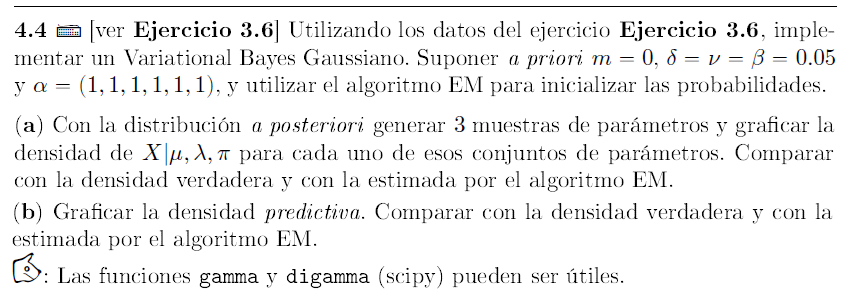

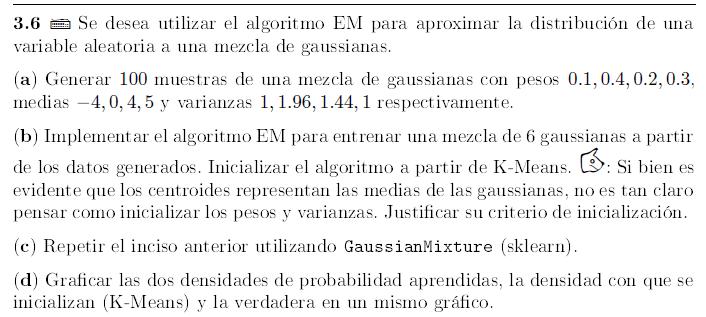

# Gaussian Variatonal Bayes

### Mean field approximation

Partimos del modelo 

$$p(\textbf{x}, \textbf{u}, \pi, \lambda, \mu) = p(\pi) \left(\prod_{k=1}^K p(\lambda_k) p(\mu_k|\lambda_k) \right) \left(\prod_{i=1}^n P(u_i|\pi) p(x_i|u_i, \mu, \lambda)\right)$$ 

con

- $\pi \sim \text{Dir}(\alpha)$
- $\lambda_k \sim \Gamma(\nu, \beta)$
- $\mu_k|\lambda_k \sim \mathcal{N}(m, (\delta\lambda_k)^{-1})$
- $u|\pi \sim \text{Cat}(\pi)$
- $x|u, \mu, \lambda \sim \mathcal{N}(\mu_u, \lambda_u^{-1})$

Se aproxima factorizando $q(\textbf{u}, \pi, \lambda, \mu|\textbf{x}) = Q_1(\textbf{u}|\textbf{x})q_2(\pi, \lambda, \mu|\textbf{x})$ siendo

- $u$ las variables latentes que indican la asignación de datos a las clases
- $\pi$ los parámetros que describen las proporciones entre las clases
- $\lambda, \mu$ parámetros de las distribuciones gaussianas de las clases
- $x$ los datos observados
- $\gamma_{i,k} = Q_1(u_i=k|\textbf{x})$ la probabilidad posterior de que el dato $x$ pertenezca a la componente $k$ donde $u_i$ es la variable latente que indica la asignación de $x$ a una componente

### Estadísticos Suficientes
Siendo $\gamma_{i,k} = Q_1(u_i=k|\textbf{x})$ (p 24/38 diapo)

- $N_k = \sum_{i=1}^n \gamma_{i,k}$ representa el peso total asignado a la componente $k$. Número efectivo de puntos asignados al componente $k$
- $f_k = \sum_{i=1}^n \gamma_{i,k} \ x_i$ suma ponderada de los datos $x_i$ asignados a la componente $k$. Ayuda a calcular la media.
- $s_k = \sum_{i=1}^n \gamma_{i,k} \ x_i^2$ suma ponderada de los cuadrados de los datos $x_i$ asignados a la componente $k$. Ayuda a calcular la varianza.

### Solución: Inicializar $\gamma_{i,k}$ con EM e iterar entre

Calcular ($\alpha_k^*, m_k^*, \delta_k^*, \nu_k^*, \beta_k^*$) a partir de $\gamma_{i,k}$ como

- $\alpha_k^* = \alpha_k + \sum_{i=1}^n \gamma_{i,k}$

- $m_k^* = \frac{\delta \ m + \sum_{i=1}^n \gamma_{i,k} \ x_i}{\delta + \sum_{i=1}^n \gamma_{i,k}}$

- $\delta_k^* = \delta + \sum_{i=1}^n \gamma_{i,k}$

- $\nu_k^* = \nu + \frac{1}{2} \sum_{i=1}^n \gamma_{i,k}$

- $\beta_k^* = \beta + \frac{\delta m^2}{2} + \frac{1}{2} \sum_{i=1}^n \gamma_{i,k} x_i^2 - \frac{(\delta m + \sum_{i=1}^n \gamma_{i,k} x_i)^2}{2(\delta + \sum_{i=1}^n \gamma_{i,k})}$

Calcular $\gamma_{i,k} = \frac{\rho_{i,k}}{\sum_{c=1}^K \rho_{i,c}}$ a partir de ($\alpha_k^*, m_k^*, \delta_k^*, \nu_k^*, \beta_k^*$) como

$$\rho_{i,k} = exp(\psi (\alpha_k^*) - \psi(\sum_{c=1}^K \alpha_c^*) + \frac{\psi(\nu_k^*) - \log(\beta_k^*)}{2} - \frac{1}{2\delta^*_k - \frac{\nu_k^*}{2 \beta_k^*}} (m_k^* - x_i)^2)$$

(1000, 3)
(1000,)
(1000,)


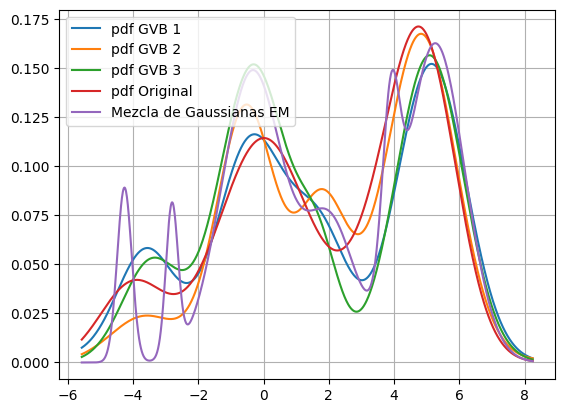

In [9]:
pesos_gaussianas = np.array([0.1, 0.4, 0.2, 0.3])
medias_gaussianas = np.array([-4, 0, 4, 5])
varianzas_gaussianas = np.array([1, 1.96, 1.44, 1])

n_muestras = 100
muestras = np.zeros(n_muestras)
length = len(pesos_gaussianas)
k = 6
max_iter = 1000
tolerancia = 1e-6

# n_muestras de la mezcla de gaussianas
for i in range(n_muestras):
    componente = np.random.choice(length, p=pesos_gaussianas)   # Elijo una componente de las 4 con las respectivas probabilidades
    muestras[i] = np.random.normal(medias_gaussianas[componente], np.sqrt(varianzas_gaussianas[componente])) # Guardo la muestra de la normal
    
modelo = GaussianMixture(n_components=k, max_iter=max_iter, tol=tolerancia)
modelo.fit(muestras.reshape(-1, 1))

pesos = modelo.weights_
medias = modelo.means_.flatten() # Utilizo flatten porque me devuelve un array de 1xk y quiero un array de 1D [[], [], []] -> []
varianzas = modelo.covariances_.flatten()

# Obtengo probabilidades a priori (P(u = k | x)) de que la muestra x pertenezca a cada una de las componente k -> (6, 100) 6 componentes y 100 muestras
gamma = modelo.predict_proba(muestras.reshape(-1, 1)).T
#print(gamma[:, 1])
#print(np.sum(gamma[:, 1]))

# Declaro los estadísticos
# Voy a tener dimensión K de componentes -> la suma la hago por columna
N_k = np.sum(gamma, axis=1) # Suma de las probabilidades P(u = k | x) para cada componente
f_k = np.sum(gamma * muestras, axis=1) # Suma de las probabilidades P(u = k | x) por la muestra x
s_k = np.sum(gamma * muestras**2, axis=1) # Suma de las probabilidades P(u = k | x) por la muestra x al cuadrado

# Ahora con los datos a priori dados en el enunciado me declaro alpha, beta, delta, nu, m e itero como está descrito en el método
alpha = np.array([1, 1, 1, 1, 1, 1])
beta = 0.05
delta = 0.05
nu = 0.05
m = 0

for i in range(max_iter):
    alpha_nuevo = alpha + N_k
    m_nuevo = (delta * m + f_k)/(delta + N_k)
    
    
    delta_nuevo = delta + N_k
    nu_nuevo = nu + 0.5 * N_k
    beta_nuevo = beta + (delta * m**2)/2 + s_k/2 - (delta*m + f_k)**2/(2 * (delta + N_k))
    
    # REVISAR
    #exponente = (digamma(alpha_nuevo) - digamma(np.sum(alpha_nuevo)) + (digamma(nu_nuevo) - np.log(beta_nuevo))/(2) - (1/((2*delta_nuevo)[:, np.newaxis])-(nu_nuevo / (2 * beta_nuevo))[:, np.newaxis] * (m_nuevo[:, np.newaxis] - muestras)**2))
    exponente = (digamma(alpha_nuevo) - digamma(np.sum(alpha_nuevo)) + (digamma(nu_nuevo) - np.log(beta_nuevo))/2 - 1/(2 * delta_nuevo))[:, np.newaxis] - (nu_nuevo/(2 * beta_nuevo))[:,np.newaxis] * (m_nuevo[:,np.newaxis] - muestras)**2
    
    rho = np.exp(exponente)
    
    gamma = rho / np.sum(rho, axis=0)
    
    # Actualizo los estadísticos
    N_k = np.sum(gamma, axis=1)
    f_k = np.sum(gamma * muestras, axis=1)
    s_k = np.sum(gamma * muestras**2, axis=1)
    
# Tengo que generar 3 muestras de los parámetros
cant_muestras = 3
lambda_var = np.random.gamma(nu_nuevo, 1/beta_nuevo, (cant_muestras, k))
mu_var = np.random.normal(m_nuevo, 1/np.sqrt(delta_nuevo * lambda_var), (cant_muestras, k))
pi_var = np.random.dirichlet(alpha_nuevo, cant_muestras)

x_values = np.linspace(np.min(muestras) - 1, np.max(muestras) + 1, 1000)
pdf_GVB = np.zeros((x_values.shape[0], cant_muestras))
pdf_real = np.zeros_like(x_values)
pdf_gm = np.zeros_like(x_values)
print(pdf_GVB.shape)
print(pdf_real.shape)
print(pdf_gm.shape)

for i in range(k):
    pdf_k = normal.pdf(x_values[:, np.newaxis], mu_var[:, i], 1/np.sqrt(lambda_var[:, i]))
    pdf_GVB = pdf_GVB + pi_var[:, i] * pdf_k
    pdf_gm = pdf_gm + pesos[i] * normal.pdf(x_values, medias[i], np.sqrt(varianzas[i]))
    
# Obtengo la pdf real con los pesos, medias y varianzas de las gaussianas originales
for i in range(4):
    pdf_real = pdf_real + pesos_gaussianas[i] * normal.pdf(x_values, medias_gaussianas[i], np.sqrt(varianzas_gaussianas[i]))
    
# Grafico
plt.figure()
plt.plot(x_values, pdf_GVB[:,0], label='pdf GVB 1')
plt.plot(x_values, pdf_GVB[:,1], label='pdf GVB 2')
plt.plot(x_values, pdf_GVB[:,2], label='pdf GVB 3')
plt.plot(x_values, pdf_real, label='pdf Original')
plt.plot(x_values, pdf_gm, label='Mezcla de Gaussianas EM')
plt.legend()
plt.grid()
plt.show()

# Densidad Predictiva

### Distribució t-Student Generalizada: $X \sim t(\mu, \Lambda, \nu)$ si

$$p(x) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \sqrt{\frac{\Lambda}{\pi\nu}} \left(1 + \Lambda \frac{(x-\mu)^2}{\nu} \right)^{-\frac{\nu + 1}{2}}$$
La expresión para la densidad predictiva es:

$$p(x_{test}|D_n) = \sum_{k=1}^K \frac{\alpha_k^*}{\sum_{c=1}^K \alpha_c^*} \cdot t \left(m_k^*, \frac{\delta_k^* \nu_k^*}{(\delta_k^* + 1)\beta_k^*}, 2\nu_k^* \right)$$

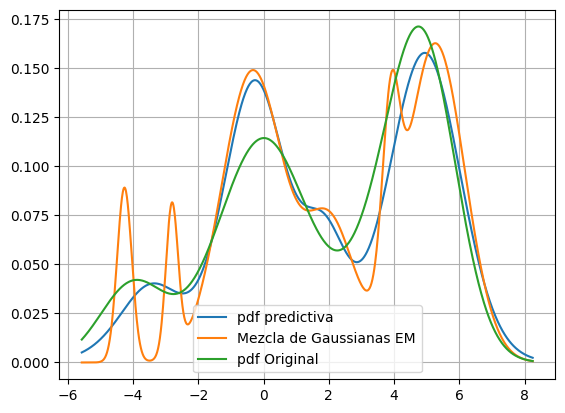

In [15]:
def t_student_gen(mu, lambda_var, nu, x):
    return scipy.special.gamma((nu + 1)/2)/scipy.special.gamma(nu/2) * np.sqrt(lambda_var/(np.pi * nu)) * (1 + lambda_var * (x - mu)**2/nu)**(-(nu + 1)/2)


pdf_pred = np.zeros((x_values.shape[0], 1))

# Parámetros para distribucion predictiva (arriba se ven t-student(m*; (delta* nu*)/(delta* + 1)beta*; 2nu*))
mu_pred = m_nuevo
lambda_pred = delta_nuevo * nu_nuevo / ((1 + delta_nuevo) * beta_nuevo)
nu_pred = 2 * nu_nuevo

for i in range(k):
    pdf_pred = pdf_pred + alpha_nuevo[i]/(np.sum(alpha_nuevo)) * t_student_gen(mu_pred[i], lambda_pred[i], nu_pred[i], x_values[:, np.newaxis])
    
plt.figure()
plt.plot(x_values, pdf_pred, label='pdf predictiva')
plt.plot(x_values, pdf_gm, label='Mezcla de Gaussianas EM')
plt.plot(x_values, pdf_real, label='pdf Original')
plt.legend()
plt.grid()
plt.show()


# Ejercicio 4.5

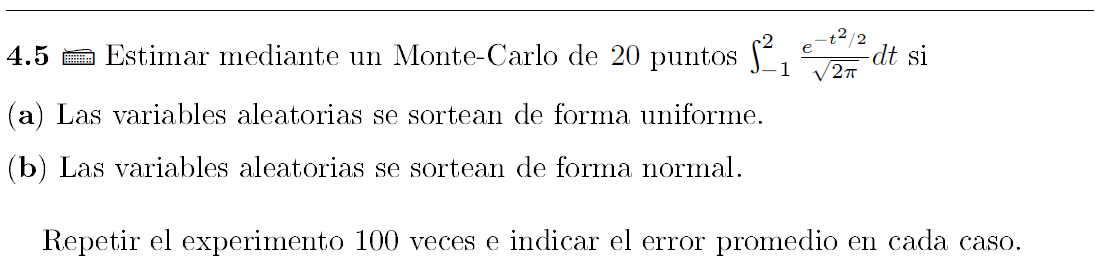

In [26]:
# Defino la función dentro de la integral
def f(t):
    return np.exp(-t**2 / 2) / np.sqrt(2 * np.pi)

a, b = -1, 2 # Intervalo integración
n = 20      # Cantidad de puntos

# Generar muestras aleatorias uniformes
muestras_unif = np.random.uniform(a, b, n)

# Evaluar la función en las muestras
f_values_unif = f(muestras_unif)

# Calcular el promedio ponderado
estimacion_montecarlo = (b - a) * np.mean(f_values_unif)

# Imprimir el resultado
print(f"Estimación de la integral mediante Monte Carlo: {estimacion_montecarlo:.6f}")


Estimación de la integral mediante Monte Carlo: 0.794121


In [32]:
# Definir la función de densidad normal estándar g(t)
def g(t, mean=0, std=1):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((t - mean)**2) / (2 * std**2))

# Generar muestras normales estándar
muestras_norm = np.random.normal(loc=0, scale=1, size=10 * n)  # Generamos más muestras por si algunas caen fuera del intervalo

# Filtrar muestras dentro del intervalo [-1, 2]
muestras_filtradas = muestras_norm[(muestras_norm >= a) & (muestras_norm <= b)][:n]

# Evaluar f(t) / g(t) para las muestras filtradas
weights = f(muestras_filtradas) / g(muestras_filtradas)

# Calcular el promedio ponderado
monte_carlo_estimation = np.mean(weights)

# Imprimir el resultado
print(f"Estimación de la integral mediante Monte Carlo (muestras normales): {monte_carlo_estimation:.6f}")


Estimación de la integral mediante Monte Carlo (muestras normales): 1.000000


# Ejercicio 4.6

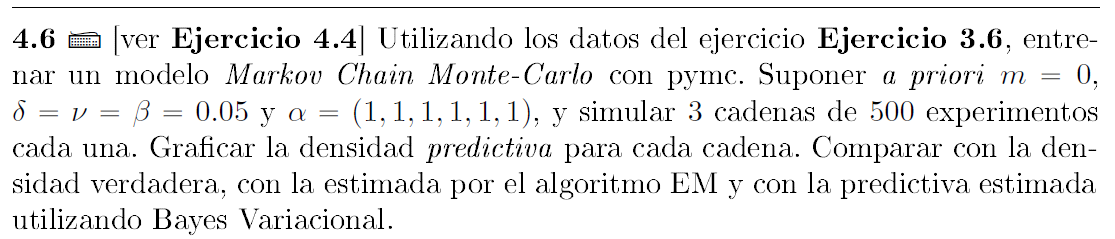

# Conceptos

### Monte Carlo:
Implica generar muestras aleatorias para aproximar distribuciones o resolver problemas que son difíciles de calcular de manera analítica.

### Cadenas de Markov:
Una cadena de Markov es un proceso estocástico donde el estado futuro depende únicamente del estado actual, y no de cómo se llegó a él. Esto se llama la propiedad de Markov.

### Markov Chain Monte Carlo (MCMC):
Combina ambos conceptos: utiliza una cadena de Markov para generar muestras de una distribución objetivo.
Es útil cuando la distribución objetivo es difícil de muestrear directamente, pero podemos calcularla (hasta una constante de normalización).


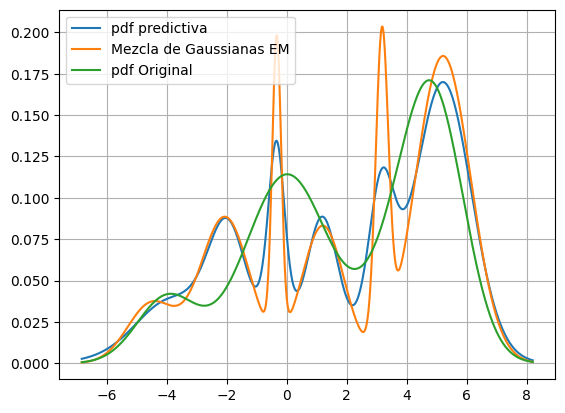

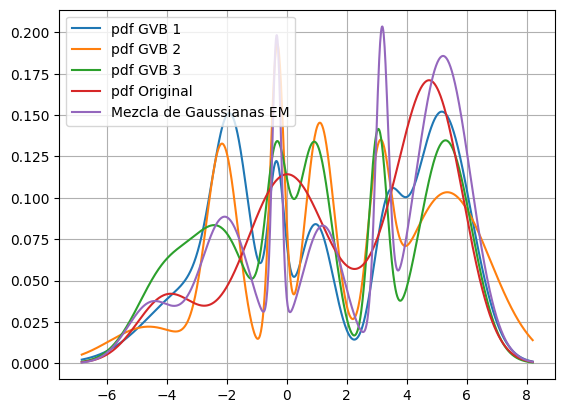

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [pi, lambda_mcmc, mu_mcmc]
>CategoricalGibbsMetropolis: [u]


C:\Users\facun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\
Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

ValueError: Not enough samples to build a trace.

In [ ]:
# Traigo el ejercicio 4.4

pesos_gaussianas = np.array([0.1, 0.4, 0.2, 0.3])
medias_gaussianas = np.array([-4, 0, 4, 5])
varianzas_gaussianas = np.array([1, 1.96, 1.44, 1])

n_muestras = 100
muestras = np.zeros(n_muestras)
length = len(pesos_gaussianas)
k = 6
max_iter = 1000
tolerancia = 1e-6

# n_muestras de la mezcla de gaussianas
for i in range(n_muestras):
    componente = np.random.choice(length, p=pesos_gaussianas)   # Elijo una componente de las 4 con las respectivas probabilidades
    muestras[i] = np.random.normal(medias_gaussianas[componente], np.sqrt(varianzas_gaussianas[componente])) # Guardo la muestra de la normal
    
modelo = GaussianMixture(n_components=k, max_iter=max_iter, tol=tolerancia)
modelo.fit(muestras.reshape(-1, 1))

pesos = modelo.weights_
medias = modelo.means_.flatten() # Utilizo flatten porque me devuelve un array de 1xk y quiero un array de 1D [[], [], []] -> []
varianzas = modelo.covariances_.flatten()

# Obtengo probabilidades a priori (P(u = k | x)) de que la muestra x pertenezca a cada una de las componente k -> (6, 100) 6 componentes y 100 muestras
gamma = modelo.predict_proba(muestras.reshape(-1, 1)).T
#print(gamma[:, 1])
#print(np.sum(gamma[:, 1]))

# Declaro los estadísticos
# Voy a tener dimensión K de componentes -> la suma la hago por columna
N_k = np.sum(gamma, axis=1) # Suma de las probabilidades P(u = k | x) para cada componente
f_k = np.sum(gamma * muestras, axis=1) # Suma de las probabilidades P(u = k | x) por la muestra x
s_k = np.sum(gamma * muestras**2, axis=1) # Suma de las probabilidades P(u = k | x) por la muestra x al cuadrado

# Ahora con los datos a priori dados en el enunciado me declaro alpha, beta, delta, nu, m e itero como está descrito en el método
alpha = np.array([1, 1, 1, 1, 1, 1])
beta = 0.05
delta = 0.05
nu = 0.05
m = 0

for i in range(max_iter):
    alpha_nuevo = alpha + N_k
    m_nuevo = (delta * m + f_k)/(delta + N_k)
    
    
    delta_nuevo = delta + N_k
    nu_nuevo = nu + 0.5 * N_k
    beta_nuevo = beta + (delta * m**2)/2 + s_k/2 - (delta*m + f_k)**2/(2 * (delta + N_k))
    
    # REVISAR
    #exponente = (digamma(alpha_nuevo) - digamma(np.sum(alpha_nuevo)) + (digamma(nu_nuevo) - np.log(beta_nuevo))/(2) - (1/((2*delta_nuevo)[:, np.newaxis])-(nu_nuevo / (2 * beta_nuevo))[:, np.newaxis] * (m_nuevo[:, np.newaxis] - muestras)**2))
    exponente = (digamma(alpha_nuevo) - digamma(np.sum(alpha_nuevo)) + (digamma(nu_nuevo) - np.log(beta_nuevo))/2 - 1/(2 * delta_nuevo))[:, np.newaxis] - (nu_nuevo/(2 * beta_nuevo))[:,np.newaxis] * (m_nuevo[:,np.newaxis] - muestras)**2
    
    rho = np.exp(exponente)
    
    gamma = rho / np.sum(rho, axis=0)
    
    # Actualizo los estadísticos
    N_k = np.sum(gamma, axis=1)
    f_k = np.sum(gamma * muestras, axis=1)
    s_k = np.sum(gamma * muestras**2, axis=1)
    
# Tengo que generar 3 muestras de los parámetros
cant_muestras = 3
lambda_var = np.random.gamma(nu_nuevo, 1/beta_nuevo, (cant_muestras, k))
mu_var = np.random.normal(m_nuevo, 1/np.sqrt(delta_nuevo * lambda_var), (cant_muestras, k))
pi_var = np.random.dirichlet(alpha_nuevo, cant_muestras)

x_values = np.linspace(np.min(muestras) - 1, np.max(muestras) + 1, 1000)
pdf_GVB = np.zeros((x_values.shape[0], cant_muestras))
pdf_real = np.zeros_like(x_values)
pdf_gm = np.zeros_like(x_values)

for i in range(k):
    pdf_k = normal.pdf(x_values[:, np.newaxis], mu_var[:, i], 1/np.sqrt(lambda_var[:, i]))
    pdf_GVB = pdf_GVB + pi_var[:, i] * pdf_k
    pdf_gm = pdf_gm + pesos[i] * normal.pdf(x_values, medias[i], np.sqrt(varianzas[i]))
    
# Obtengo la pdf real con los pesos, medias y varianzas de las gaussianas originales
for i in range(4):
    pdf_real = pdf_real + pesos_gaussianas[i] * normal.pdf(x_values, medias_gaussianas[i], np.sqrt(varianzas_gaussianas[i]))


def t_student_gen(mu, lambda_var, nu, x):
    return scipy.special.gamma((nu + 1)/2)/scipy.special.gamma(nu/2) * np.sqrt(lambda_var/(np.pi * nu)) * (1 + lambda_var * (x - mu)**2/nu)**(-(nu + 1)/2)


pdf_pred = np.zeros((x_values.shape[0], 1))

# Parámetros para distribucion predictiva (arriba se ven t-student(m*; (delta* nu*)/(delta* + 1)beta*; 2nu*))
mu_pred = m_nuevo
lambda_pred = delta_nuevo * nu_nuevo / ((1 + delta_nuevo) * beta_nuevo)
nu_pred = 2 * nu_nuevo

for i in range(k):
    pdf_pred = pdf_pred + alpha_nuevo[i]/(np.sum(alpha_nuevo)) * t_student_gen(mu_pred[i], lambda_pred[i], nu_pred[i], x_values[:, np.newaxis])
    
    
plt.figure()
plt.plot(x_values, pdf_pred, label='pdf predictiva')
plt.plot(x_values, pdf_gm, label='Mezcla de Gaussianas EM')
plt.plot(x_values, pdf_real, label='pdf Original')
plt.legend()
plt.grid()
plt.show()

# Grafico
plt.figure()
plt.plot(x_values, pdf_GVB[:,0], label='pdf GVB 1')
plt.plot(x_values, pdf_GVB[:,1], label='pdf GVB 2')
plt.plot(x_values, pdf_GVB[:,2], label='pdf GVB 3')
plt.plot(x_values, pdf_real, label='pdf Original')
plt.plot(x_values, pdf_gm, label='Mezcla de Gaussianas EM')
plt.legend()
plt.grid()
plt.show()

# --------------------------------------------------------------------------------- 4.6 -----------------------------------------------------------------------------------------
n_muestras_cadena = 500
k_cadenas = 3

mcmc_model = pm.Model()

with mcmc_model:
    pi_mcmc = pm.Dirichlet('pi', a = alpha)
    lambda_mcmc = pm.Gamma('lambda_mcmc', alpha = nu, beta = beta, shape = 6)
    mu_mcmc = pm.Normal('mu_mcmc', mu = m, sigma = np.sqrt(1 / (delta * lambda_mcmc)), shape = 6)
    u = pm.Categorical('u', p=pi_mcmc, shape = muestras.shape[0])

    # Defino la variable observada
    x = pm.Normal('x', mu=mu_mcmc[u], sigma = np.sqrt(1 / lambda_mcmc[u]), observed = muestras)
    
    trace = pm.sample(n_muestras_cadena, chains = k_cadenas)
    
    muestras_posterior = pm.sample_posterior_predictive(trace)
    
muestras_predecidas = muestras_posterior.posterior_predictive['x']


    

# Ejercicio 4.7

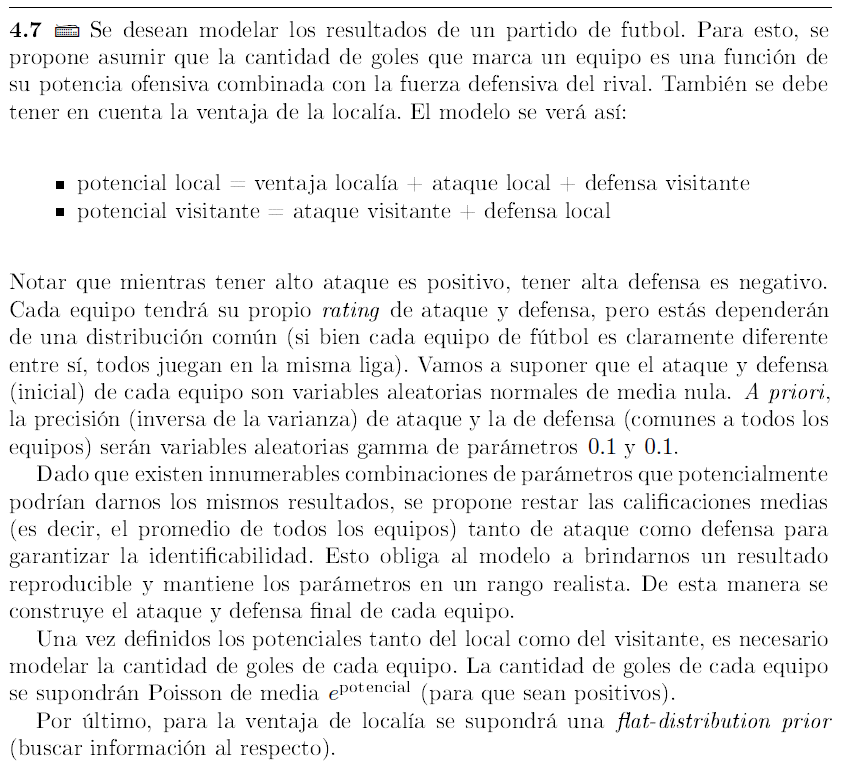

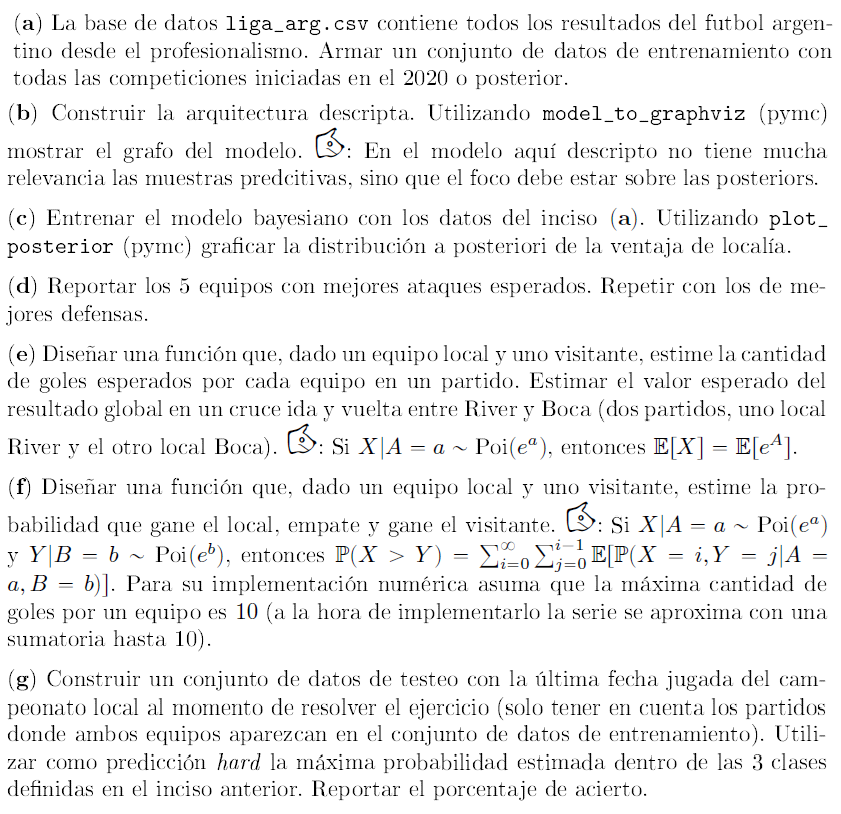

Se definen el modelo:

- potencia local = ventaja localía + ataque local + defensa visitante

- potencia visitante = ataque visitante + defensa local

Con:

- ataque (+) $\sim \mathcal{N}(0, \frac{1}{precisión_a})$

- defensa (-) $\sim \mathcal{N}(0, \frac{1}{precisión_d})$

- $precisión_a = precisión_d \sim \Gamma(0.1, 0.1)$

- Cantidad de goles $\sim \text{Poi}(e^{\text{potencial}})$

- Ventaja Localía $\sim \text{flat-distribution prior}$

In [28]:
# Item A
datos_liga = pd.read_csv('data/liga_arg.csv')

# Extraer el año de la columna 'date_name' y crear una nueva columna 'year'
datos_liga['year'] = datos_liga['date_name'].str.extract(r'(\d{4})').astype(int)
datos_liga_entrenamiento = datos_liga[datos_liga['year'] >= 2020]

datos_liga_entrenamiento.head()

,date_name,local_team,local_result,visitor_result,visitor_team,year
32608,Copa de la Liga Profesional 2020,Gimnasia (LP),3,0,Patronato,2020
32609,Copa de la Liga Profesional 2020,Talleres (C),3,1,Newells,2020
32610,Copa de la Liga Profesional 2020,Aldosivi,0,0,Estudiantes (LP),2020
32611,Copa de la Liga Profesional 2020,Velez,1,1,Huracan,2020
32612,Copa de la Liga Profesional 2020,Argentinos,0,0,San Lorenzo,2020


In [32]:
# Combinar las columnas 'local_team' y 'visitor_team', eliminar duplicados y convertir a una lista
equipos = pd.concat([datos_liga['local_team'], datos_liga['visitor_team']]).drop_duplicates().tolist()
cant_equipos = equipos.__len__()

#print(equipos)
#print(cant_equipos)

# Combinar las columnas de equipos locales y visitantes, eliminar duplicados y ordenarlos alfabéticamente
equipos_unicos = sorted(set(datos_liga_entrenamiento['local_team']).union(set(datos_liga_entrenamiento['visitor_team'])))
cant_equipos_entrenamiento = equipos_unicos.__len__()

# Crear un diccionario que asigne un número único a cada equipo
equipos_dict = {equipo: idx for idx, equipo in enumerate(equipos_unicos)}

# Convertir los equipos locales y visitantes en sus valores numéricos
datos_liga_entrenamiento['idx_local'] = datos_liga_entrenamiento['local_team'].map(equipos_dict)
datos_liga_entrenamiento['idx_visitante'] = datos_liga_entrenamiento['visitor_team'].map(equipos_dict)

# Imprimir los resultados
print(equipos_unicos)
print(datos_liga_entrenamiento)
print(cant_equipos_entrenamiento)



['Aldosivi', 'Argentinos', 'Arsenal', 'Atl Tucuman', 'Banfield', 'Barracas Central', 'Belgrano', 'Boca Juniors', 'Central Cba (SdE)', 'Colon', 'Def y Justicia', 'Estudiantes (LP)', 'Gimnasia (LP)', 'Godoy Cruz', 'Huracan', 'Independiente', 'Instituto', 'Lanus', 'Newells', 'Patronato', 'Platense', 'Racing Club', 'River Plate', 'Rosario Central', 'San Lorenzo', 'Sarmiento (J)', 'Talleres (C)', 'Tigre', 'Union', 'Velez']
                              date_name         local_team  local_result  \
32608  Copa de la Liga Profesional 2020      Gimnasia (LP)             3   
32609  Copa de la Liga Profesional 2020       Talleres (C)             3   
32610  Copa de la Liga Profesional 2020           Aldosivi             0   
32611  Copa de la Liga Profesional 2020              Velez             1   
32612  Copa de la Liga Profesional 2020         Argentinos             0   
...                                 ...                ...           ...   
34351              Copa de la Liga 2023       

C:\Users\facun\AppData\Local\Temp\ipykernel_18648\3091557159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_liga_entrenamiento['idx_local'] = datos_liga_entrenamiento['local_team'].map(equipos_dict)
C:\Users\facun\AppData\Local\Temp\ipykernel_18648\3091557159.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_liga_entrenamiento['idx_visitante'] = datos_liga_entrenamiento['visitor_team'].map(equipos_dict)


In [ ]:
with pm.Model() as model:
    precision_ataque = pm.Gamma('precision_ataque', alpha=0.1, beta=0.1) # Prior para la precisión del ataque
    precision_defensa = pm.Gamma('precision_defensa', alpha=0.1, beta=0.1) # Prior para la precisión de la defensa
    
    ataque_inicial = pm.Normal('ataque_inicial', mu=0, sigma=1/pm.math.sqrt(precision_ataque), shape=cant_equipos_entrenamiento) # Ataque inicial de cada equipo
    defensa_inicial = pm.Normal('defensa_inicial', mu=0, sigma=1/pm.math.sqrt(precision_defensa), shape=cant_equipos_entrenamiento) # Defensa inicial de cada equipo
    
    ventaja_local = pm.Flat('ventaja_local') # flat distribution
    
    # Se resta el promedio de todos los equipos para garantizar la identificabilidad
    ataque = pm.Deterministic('ataque', ataque_inicial - pm.math.mean(ataque_inicial)) # Ataque de cada equipo
    defensa = pm.Deterministic('defensa', defensa_inicial - pm.math.mean(defensa_inicial)) # Defensa de cada equipo
    
    potencia_local = ventaja_local + ataque[datos_liga_entrenamiento['idx_local']] + defensa[datos_liga_entrenamiento['idx_visitante']]
    potencia_visitante = ataque[datos_liga_entrenamiento['idx_visitante']] + defensa[datos_liga_entrenamiento['idx_local']]
    
    cant_goles_local = pm.Poisson('cant_goles_local', mu=pm.math.exp(potencia_local), observed=datos_liga_entrenamiento['local_score'])
    cant_goles_visitante = pm.Poisson('cant_goles_visitante', mu=pm.math.exp(potencia_visitante), observed=datos_liga_entrenamiento['visitor_score'])
    
    trace = pm.sample(1000)
    az.to_netcdf(trace, 'trace_ej4_7.nc')
    
    #grafico = pm.model_to_graphviz(model) # Visualizo el modelo generado
    pm.model_to_graphviz(model).render('model_ej4_7', format='png', cleanup=True)

# Item C

In [ ]:
# Entreno el modelo Bayesiano con los datos de (a) y grafico la distribución a posteriori de la ventaja del local
ventaja = trace.posterior['ventaja_local']
pm.plot_posterior(ventaja)
plt.title('Distribución a posteriori de la ventaja del local')
plt.grid()
plt.show()

# Item D

In [34]:
# Calcular las medias de ataque
ataques = trace.posterior['ataque']  # Shape = (chain, draw, equipos)
medias_ataques = ataques.mean(dim=("chain", "draw")).values  # Shape = (equipos,)
medias_ataques_equipos = pd.DataFrame({"Equipo": equipos_unicos, "Medias Ataques": medias_ataques})

# Calcular las medias de defensa
defensas = trace.posterior['defensa']  # Shape = (chain, draw, equipos)
medias_defensas = defensas.mean(dim=("chain", "draw")).values  # Shape = (equipos,)
medias_defensa_equipos = pd.DataFrame({"Equipo": equipos_unicos, "Medias Defensas": medias_defensas})

# Obtener los 5 mejores equipos por ataque
top_ataques = medias_ataques_equipos.sort_values(by="Medias Ataques", ascending=False).head(5)

# Obtener los 5 mejores equipos por defensa
top_defensas = medias_defensa_equipos.sort_values(by="Medias Defensas", ascending=True).head(5)

# Imprimir los resultados
print("Top 5 equipos con mejores ataques:")
print(top_ataques)

print("\nTop 5 equipos con mejores defensas:")
print(top_defensas)


NameError: name 'trace' is not defined

# Item E

In [ ]:
# Función para estimar cantidad de goles esperados por equipo en un partido.

def estimar_goles(equipo_local, equipo_visitante, equipos, trace):
    # Obtengo el índie de los equipos
    idx_local = equipos[equipo_local]
    idx_visitante = equipos[equipo_visitante]
    
    # Obtengo los valores de ventaja, ataques y defensas
    ventaja_local = trace.posterior['ventaja_local'].values
    ataque_local = trace.posterior['ataque'][:, :, idx_local].values # Shape = (chain, draw) = (2, 1000)
    defensa_local = trace.posterior['defensa'][:, :, idx_local].values # Shape = (chain, draw)
    ataque_visitante = trace.posterior['ataque'][:, :, idx_visitante].values # Shape = (chain, draw)
    defensa_visitante = trace.posterior['defensa'][:, :, idx_visitante].values # Shape = (chain, draw)
    
    # Hago el cálculo de las potencias
    potencia_local = ventaja_local + ataque_local + defensa_visitante
    potencia_visitante = ataque_visitante + defensa_local
    
    # Calculo la cantidad de goles esperados
    goles_local = np.mean(np.exp(potencia_local))
    goles_visitante = np.mean(np.exp(potencia_visitante))
    
    return goles_local, goles_visitante

# Estimo goles partido Boca vs River y River vs Boca
goles_boca_local, goles_river_visitante = estimar_goles('Boca Juniors', 'River Plate', equipos_dict, trace)
goles_river_local, goles_boca_visitante = estimar_goles('River Plate', 'Boca Juniors', equipos_dict, trace)

print(f"Goles esperados en el partido Boca Juniors vs River Plate: {goles_boca_local:.1f} - {goles_river_visitante:.1f}")
print(f"Goles esperados en el partido River Plate vs Boca Juniors: {goles_river_local:.1f} - {goles_boca_visitante:.1f}")

# Item F

#### Función que dado un equipo local y uno visitante, estime la probabilidad que gane el local, el visitante o empaten.

Asumo máxima cantidad de goles por equipo de 10.

Si $X|A = a \sim \text{Poi}(e^a)$ y $Y|B = b \sim \text{Poi}(e^b)$, entonces 

$$P(X > Y) = \sum_{i=0}^\infty \sum_{j=0}^{i-1} E \left[P(X = i, Y = j | A, B) \right]$$

$$= \sum_{i=0}^\infty \sum_{j=0}^{i-1} E \left[ P(X = i|A = a) P(Y = j|B = b)\right]$$


In [37]:
# Función que dado un equipo local y uno visitante, estime la probabilidad que gane el local, el visitante o empaten.
def calcular_probabilidades(equipo_local, equipo_visitante, equipos, trace):
     # Obtengo el índie de los equipos
    idx_local = equipos[equipo_local]
    idx_visitante = equipos[equipo_visitante]
    
    # Obtengo los valores de ventaja, ataques y defensas
    ventaja_local = trace.posterior['ventaja_local'].values
    ataque_local = trace.posterior['ataque'][:, :, idx_local].values # Shape = (chain, draw) = (2, 1000)
    defensa_local = trace.posterior['defensa'][:, :, idx_local].values # Shape = (chain, draw)
    ataque_visitante = trace.posterior['ataque'][:, :, idx_visitante].values # Shape = (chain, draw)
    defensa_visitante = trace.posterior['defensa'][:, :, idx_visitante].values # Shape = (chain, draw)
    
    # Hago el cálculo de las potencias
    potencia_local = ventaja_local + ataque_local + defensa_visitante
    potencia_visitante = ataque_visitante + defensa_local
    
    # Defino la cantidad máxima de goles por equipo
    max_goles = 10
    
    prob_local_gane = 0
    for i in range(1, max_goles + 1):
        # El 2do for es hasta que tenga menos goles que el local
        for j in range(i):
            prob_local_gane += stats.poisson.pmf(i, np.exp(potencia_local)) * stats.poisson.pmf(j, np.exp(potencia_visitante))
            
    prob_visitante_gane = 0
    for i in range(1, max_goles + 1):
        # El 2do for es hasta que tenga menos goles que el visitante
        for j in range(i):
            prob_visitante_gane += stats.poisson.pmf(i, np.exp(potencia_visitante)) * stats.poisson.pmf(j, np.exp(potencia_local))
            
    prob_empate = 0
    for i in range(max_goles + 1): 
        prob_empate += stats.poisson.pmf(i, np.exp(potencia_local)) * stats.poisson.pmf(i, np.exp(potencia_visitante))
        
    # prob_local_gane, prob_visitante_gane y prob_empate tienen shape (chain, draw)
    # Retorno la media de las probabilidades
    prob_local_gane = np.mean(prob_local_gane)
    prob_visitante_gane = np.mean(prob_visitante_gane)
    prob_empate = np.mean(prob_empate)
    
    return prob_local_gane, prob_visitante_gane, prob_empate


# Calculo las probabilidades para un Independiente vs Racing
equipo_local = 'Independiente'
equipo_visitante = 'Racing Club'

prob_local_gane, prob_visitante_gane, prob_empate = calcular_probabilidades(equipo_local, equipo_visitante, equipos_dict, trace)

print("\nPartido Ida")
print(f"Probabilidad de que gane {equipo_local}: {prob_local_gane:.3f}")
print(f"Probabilidad de que gane {equipo_visitante}: {prob_visitante_gane:.3f}")
print(f"Probabilidad de empate: {prob_empate:.3f}")

# Calculo las probabilidades para un Racing vs Independiente
equipo_local = 'Racing Club'
equipo_visitante = 'Independiente'

prob_local_gane, prob_visitante_gane, prob_empate = calcular_probabilidades(equipo_local, equipo_visitante, equipos_dict, trace)

print("\nPartido Vuelta")
print(f"Probabilidad de que gane {equipo_local}: {prob_local_gane:.3f}")
print(f"Probabilidad de que gane {equipo_visitante}: {prob_visitante_gane:.3f}")
print(f"Probabilidad de empate: {prob_empate:.3f}")


NameError: name 'trace' is not defined

# Item G

In [ ]:
# Saco el partido de Ind Rivadavia vs Deportivo Riestra por no tener datos de entrenamiento de Ind.
resultados_jornada_27_liga_2024 = [
    {"date_name": "Liga Profesional 2024", "local_team": "Estudiantes (LP)", "local_result": 2, "visitor_result": 2, "visitor_team": "Argentinos", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Barracas Central", "local_result": 3, "visitor_result": 3, "visitor_team": "Lanus", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "San Lorenzo", "local_result": 0, "visitor_result": 1, "visitor_team": "Tigre", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Banfield", "local_result": 1, "visitor_result": 1, "visitor_team": "Sarmiento (J)", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Rosario Central", "local_result": 2, "visitor_result": 1, "visitor_team": "Belgrano", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Instituto", "local_result": 1, "visitor_result": 3, "visitor_team": "Godoy Cruz", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Boca Juniors", "local_result": 0, "visitor_result": 0, "visitor_team": "Independiente", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Racing Club", "local_result": 1, "visitor_result": 0, "visitor_team": "River Plate", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Def y Justicia", "local_result": 0, "visitor_result": 0, "visitor_team": "Union", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Platense", "local_result": 1, "visitor_result": 0, "visitor_team": "Gimnasia (LP)", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Velez", "local_result": 2, "visitor_result": 0, "visitor_team": "Huracan", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Talleres (C)", "local_result": 1, "visitor_result": 3, "visitor_team": "Newells", "year": 2024},
    {"date_name": "Liga Profesional 2024", "local_team": "Atl Tucuman", "local_result": 2, "visitor_result": 0, "visitor_team": "Central Cba (SdE)", "year": 2024},
]

datos_ultima_fecha = pd.DataFrame(resultados_jornada_27_liga_2024)

# Lista para almacenar los resultados estimados y reales
resultados_estimados = []
resultados_reales = []

# Itero partido a partido
for idx, partido in datos_ultima_fecha.iterrows():
    # Me quedo con los equipos del partido
    equipo_local = partido['local_team']
    equipo_visitante = partido['visitor_team']

    # Calculo las probabilidades
    prob_local_gane, prob_visitante_gane, prob_empate = calcular_probabilidades(equipo_local, equipo_visitante, equipos_dict, trace)
    
    # Quiero ver si el local gana, empata o pierde según las probabilidades
    if prob_local_gane > prob_visitante_gane and prob_local_gane > prob_empate:
        resultados_estimados.append('Local')
    elif prob_visitante_gane > prob_local_gane and prob_visitante_gane > prob_empate:
        resultados_estimados.append('Visitante')
    else:
        resultados_estimados.append('Empate')
        
    # Comparo los resultados reales del partido
    if partido['local_result'] > partido['visitor_result']:
        resultados_reales.append('Local')
    elif partido['local_result'] < partido['visitor_result']:
        resultados_reales.append('Visitante')
    else:
        resultados_reales.append('Empate')

# Calcular los aciertos
aciertos = sum([1 for est, real in zip(resultados_estimados, resultados_reales) if est == real])

# Calcular el porcentaje de aciertos
porcentaje_acierto = (aciertos / len(resultados_estimados)) * 100

# Imprimir el porcentaje de aciertos
print(f"Porcentaje de aciertos: {porcentaje_acierto:.2f}%")

        
print(resultados_estimados)
print(resultados_reales)